In [ ]:
import keras

Using TensorFlow backend.


In [2]:
from keras.models import load_model, Model
#autoencoder_egr = load_model('Autoencoder_Final_EGR.h5')
#predictor_egr = load_model('Predictor_Final_EGR.h5')

In [3]:
#(autoencoder_egr.summary())

In [4]:
#predictor_egr.summary()

In [1]:
bucket="relai.poc.data"
folder_base_test='res_radiator_new_stitched/annotation/test/'
folder_base_train='res_radiator_new_stitched/annotation/train/'
csv='.csv'

from d2 import get_vin_list
f_test=get_vin_list(bucket=bucket, folder_base=folder_base_test, file_extn=csv)
f_train=get_vin_list(bucket=bucket, folder_base=folder_base_train, file_extn=csv)

#path_test='s3://{}/{}{}{}'.format(bucket, folder_base_test, vin, csv)
#path_train='s3://{}/{}{}{}'.format(bucket, folder_base_train, vin, csv)


In [38]:
col_list_335 = ['distance_idle%',
 'distance_overrun%',
 'distance_decel%',
 'distance_accel%',
 'distance_cruise%',
 'statedwell_km',
 'time_idle%',
 'time_overrun%',
 'time_decel%',
 'time_accel%',
 'time_cruise%',
 '5409',
 '535',
 '525569',
 '6912',
 '5888',
 '6144',
 '131363',
 '131619',
 '8501',
 '5688',
 '262288',
 '131895',
 '4386',
 '69888',
 '5169',
 '4356',
 '4406',
 '131906',
 '267048',
 'total',
 '22',
 '4377',
 '408',
 '267012',
 '4390',
 '9502',
 '4369',
 '1315',
 '4371',
 '65939',
 '4613',
 '1028',
 '1025',
 '1030',
 '1156',
 '4614',
 '66104',
 '1159',
 '65816',
 '275',
 '1344',
 '5376',
 '1316',
 '4374',
 '66370',
 '267024',
 '537',
 '663',
 '9501',
 '70434',
 '267042',
 '257',
 '295',
 '6657',
 '131352',
 '5120',
 '6400',
 '66359',
 '1026',
 '4626',
 '1314',
 '267060',
 '4385',
 '5696',
 '4612',
 '533',
 '5634',
 '4375',
 '5159',
 '74065',
 '5409_count',
 '535_count',
 '525569_count',
 '6912_count',
 '5888_count',
 '6144_count',
 '131363_count',
 '131619_count',
 '8501_count',
 '5688_count',
 '262288_count',
 '131895_count',
 '4386_count',
 '69888_count',
 '5169_count',
 '4356_count',
 '4406_count',
 '131906_count',
 '267048_count',
 'total_count',
 '22_count',
 '4377_count',
 '408_count',
 '267012_count',
 '4390_count',
 '9502_count',
 '4369_count',
 '1315_count',
 '4371_count',
 '65939_count',
 '4613_count',
 '1028_count',
 '1025_count',
 '1030_count',
 '1156_count',
 '4614_count',
 '66104_count',
 '1159_count',
 '65816_count',
 '275_count',
 '1344_count',
 '5376_count',
 '1316_count',
 '4374_count',
 '66370_count',
 '267024_count',
 '537_count',
 '663_count',
 '9501_count',
 '70434_count',
 '267042_count',
 '257_count',
 '295_count',
 '6657_count',
 '131352_count',
 '5120_count',
 '6400_count',
 '66359_count',
 '1026_count',
 '4626_count',
 '1314_count',
 '267060_count',
 '4385_count',
 '5696_count',
 '4612_count',
 '533_count',
 '5634_count',
 '4375_count',
 '5159_count',
 '74065_count',
 'ENGINE_SPEED_x_mean',
 'ENGINE_SPEED_x_median',
 'ENGINE_SPEED_x_variance',
 'ENGINE_SPEED_x_max',
 'ENGINE_SPEED_x_min',
 'ENGINE_SPEED_x_max-min',
 'ENGINE_SPEED_x_kurtosis',
 'ENGINE_SPEED_x_skewness',
 'THROTTLE_POS_mean',
 'THROTTLE_POS_median',
 'THROTTLE_POS_variance',
 'THROTTLE_POS_max',
 'THROTTLE_POS_min',
 'THROTTLE_POS_max-min',
 'THROTTLE_POS_kurtosis',
 'THROTTLE_POS_skewness',
 'EFF_TORQUE_mean',
 'EFF_TORQUE_median',
 'EFF_TORQUE_variance',
 'EFF_TORQUE_max',
 'EFF_TORQUE_min',
 'EFF_TORQUE_max-min',
 'EFF_TORQUE_kurtosis',
 'EFF_TORQUE_skewness',
 'Power_mean',
 'Power_median',
 'Power_variance',
 'Power_max',
 'Power_min',
 'Power_max-min',
 'Power_kurtosis',
 'Power_skewness',
 'power[-inf,-10]_count',
 'power[-inf,-10]_mean',
 'power[-inf,-10]_median',
 'power[-inf,-10]_variance',
 'power[-inf,-10]_max',
 'power[-inf,-10]_min',
 'power[-inf,-10]_max-min',
 'power[-inf,-10]_kurtosis',
 'power[-inf,-10]_skewness',
 'power[-10,0]_count',
 'power[-10,0]_mean',
 'power[-10,0]_median',
 'power[-10,0]_variance',
 'power[-10,0]_max',
 'power[-10,0]_min',
 'power[-10,0]_max-min',
 'power[-10,0]_kurtosis',
 'power[-10,0]_skewness',
 'power[0,25]_count',
 'power[0,25]_mean',
 'power[0,25]_median',
 'power[0,25]_variance',
 'power[0,25]_max',
 'power[0,25]_min',
 'power[0,25]_max-min',
 'power[0,25]_kurtosis',
 'power[0,25]_skewness',
 'power[25,50]_count',
 'power[25,50]_mean',
 'power[25,50]_median',
 'power[25,50]_variance',
 'power[25,50]_max',
 'power[25,50]_min',
 'power[25,50]_max-min',
 'power[25,50]_kurtosis',
 'power[25,50]_skewness',
 'power[50,75]_count',
 'power[50,75]_mean',
 'power[50,75]_median',
 'power[50,75]_variance',
 'power[50,75]_max',
 'power[50,75]_min',
 'power[50,75]_max-min',
 'power[50,75]_kurtosis',
 'power[50,75]_skewness',
 'power[75,inf]_count',
 'power[75,inf]_mean',
 'power[75,inf]_median',
 'power[75,inf]_variance',
 'power[75,inf]_max',
 'power[75,inf]_min',
 'power[75,inf]_max-min',
 'power[75,inf]_kurtosis',
 'power[75,inf]_skewness',
 'ENG_COOLANT_TEMP_mean',
 'ENG_COOLANT_TEMP_median',
 'ENG_COOLANT_TEMP_variance',
 'ENG_COOLANT_TEMP_max',
 'ENG_COOLANT_TEMP_min',
 'ENG_COOLANT_TEMP_max-min',
 'ENG_COOLANT_TEMP_kurtosis',
 'ENG_COOLANT_TEMP_skewness',
 'ENG_OIL_ACTUAL_mean',
 'ENG_OIL_ACTUAL_median',
 'ENG_OIL_ACTUAL_variance',
 'ENG_OIL_ACTUAL_max',
 'ENG_OIL_ACTUAL_min',
 'ENG_OIL_ACTUAL_max-min',
 'ENG_OIL_ACTUAL_kurtosis',
 'ENG_OIL_ACTUAL_skewness',
 'FUEL_CONSUM_mean',
 'FUEL_CONSUM_median',
 'FUEL_CONSUM_variance',
 'FUEL_CONSUM_max',
 'FUEL_CONSUM_min',
 'FUEL_CONSUM_max-min',
 'FUEL_CONSUM_kurtosis',
 'FUEL_CONSUM_skewness',
 'VEHICAL_BATTERY_POTENTIAL_mean',
 'VEHICAL_BATTERY_POTENTIAL_median',
 'VEHICAL_BATTERY_POTENTIAL_variance',
 'VEHICAL_BATTERY_POTENTIAL_max',
 'VEHICAL_BATTERY_POTENTIAL_min',
 'VEHICAL_BATTERY_POTENTIAL_max-min',
 'VEHICAL_BATTERY_POTENTIAL_kurtosis',
 'VEHICAL_BATTERY_POTENTIAL_skewness',
 ]
# 'ANN_EGR', 'ANN_CylinderHeadGasket', 'ANN_CylinderHeadCover', 'ANN_Radiator'

In [2]:
vin_pathlist_test = ['s3://{}/{}{}{}'.format(bucket, folder_base_test, vin, csv) for vin in f_test[0:int(len(f_test)/2)]]
vin_pathlist_train = ['s3://{}/{}{}{}'.format(bucket, folder_base_train, vin, csv) for vin in f_train[0:int(len(f_train)/2)]] 

X_train_path = vin_pathlist_test + vin_pathlist_train
len(X_train_path)

174

In [3]:
vin_pathlist_test = ['s3://{}/{}{}{}'.format(bucket, folder_base_test, vin, csv) for vin in f_test[int(len(f_test)/2):]]
vin_pathlist_train = ['s3://{}/{}{}{}'.format(bucket, folder_base_train, vin, csv) for vin in f_train[int(len(f_train)/2):]] 

X_test_path = vin_pathlist_test + vin_pathlist_train
len(X_test_path)

175

In [4]:
import pandas as pd
X_test_list = []
for i in X_test_path:
    X_test_list.append(pd.read_csv(i))


In [121]:
#df_anova=pd.read_csv('ANOVA_EGR.csv')
#col_anova = list(df_anova[df_anova['F-Statistic']>1]['Feature'].values)
import scipy.stats as stats
F=[]
Y_train_df = pd.DataFrame(Y_train)
N= X_train[(Y_train_df['ANN_EGR'].isin([0,'0']))]
P= X_train[(Y_train_df['ANN_EGR'].isin(['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10',]))]
#P= X_train[Y_train=='P1' or Y_train=='P2' or Y_train=='P3' or Y_train=='P4' or Y_train=='P5' or Y_train=='P6' or Y_train=='P7' or Y_train=='P8' or Y_train=='P9' or Y_train=='P10']
    
for i in col_list_335:
    F.append(stats.f_oneway(N[i],P[i])[1])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:3235: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


In [90]:
df_tmp21 = pd.DataFrame({'F': F, 'col_list_335':col_list_335 })

In [151]:
col_anova=list((df_tmp21[df_tmp21['F']>4])['col_list_335'].values)

In [140]:
len(pd.Series(F)[pd.Series(F)>0.05])

118

In [267]:
df_tmp21.to_csv('ANOVA_EGR_dataset21.csv')

(0, 10)

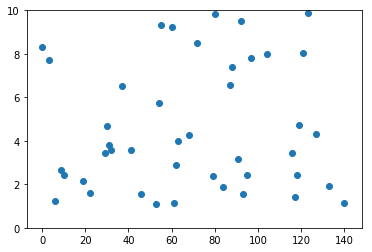

In [116]:
import matplotlib.pyplot as plt
plt.scatter(range(0,142),df_tmp21[df_tmp21['F']>1]['F'].values )
plt.ylim(0,10)

In [61]:
Y_train.unique()

array([0, '0', 'P10', 'P9', 'P8', 'P7', 'P6', 'P5', 'P4', 'P3', 'P2',
       'P1'], dtype=object)

In [9]:
X_test = pd.concat(X_test_list, axis=0)#[col_anova]

In [10]:
X_test.shape

(70225, 335)

In [199]:
X_test.fillna(method='ffill', inplace=True)
X_test.fillna(method='bfill', inplace=True)
X_test.dropna().shape

(70225, 118)

In [6]:
import pandas as pd
X_train_list = []
for i in X_train_path:
    X_train_list.append(pd.read_csv(i))


In [8]:
X_train = pd.concat(X_train_list, axis=0)#[col_anova]

In [11]:
X_train.shape

(79084, 335)

In [16]:
len(X_train[X_train['ANN_EGR']=='P1'])

184

In [17]:
len(X_test[X_test['ANN_EGR']=='P1'])

194

In [200]:
X_train.fillna(method='ffill', inplace=True)
X_train.fillna(method='bfill', inplace=True)
X_train.dropna().shape

(79084, 118)

In [18]:
194+184


378

In [165]:
#autoencoder_egr.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)

import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
#from keras import optimizers
from keras.optimizers import Adam
from sklearn.preprocessing import scale
inputshape=118
autoencoder_rad = Sequential()
autoencoder_rad.add(Dense(16, activation='linear', input_shape=(inputshape,)))
autoencoder_rad.add(Dense(8, activation='tanh', name="bottleneck"))
autoencoder_rad.add(Dense(16,  activation='relu'))
autoencoder_rad.add(Dense(inputshape,  activation='sigmoid', name='reconstructedoutput')) 
encoder_rad = Model(autoencoder_rad.input, autoencoder_rad.get_layer('bottleneck').output)

# set weights & bias

#encoded_data = encoder_rad.predict(_x)
#decoded_output = autoencoder_rad.predict(_x)
from sklearn.preprocessing import RobustScaler as rs 
rs1 = rs().fit(X_train)
X_train_scale = rs1.transform(X_train)  

autoencoder_rad.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
autoencoder_rad.fit(x=X_train_scale, y=X_train_scale, batch_size=2000, epochs=50, verbose=1)
#predictor_egr = load_model('Predictor_Final_EGR.h5')


Epoch 1/50
79084/79084 [==============================] - 2s 21us/step - loss: 1462.4813 - acc: 0.0764
Epoch 2/50
79084/79084 [==============================] - 1s 9us/step - loss: 1462.2643 - acc: 0.1568
Epoch 3/50
79084/79084 [==============================] - 1s 9us/step - loss: 1462.0460 - acc: 0.1489
Epoch 4/50
79084/79084 [==============================] - 1s 9us/step - loss: 1461.8998 - acc: 0.1537
Epoch 5/50
79084/79084 [==============================] - 1s 9us/step - loss: 1461.8253 - acc: 0.1638
Epoch 6/50
79084/79084 [==============================] - 1s 9us/step - loss: 1461.7863 - acc: 0.1646
Epoch 7/50
79084/79084 [==============================] - 1s 9us/step - loss: 1461.7627 - acc: 0.1624
Epoch 8/50
79084/79084 [==============================] - 1s 9us/step - loss: 1461.7466 - acc: 0.1584
Epoch 9/50
79084/79084 [==============================] - 1s 9us/step - loss: 1461.7345 - acc: 0.1609
Epoch 10/50
79084/79084 [==============================] - 1s 9us/step - loss: 14

In [166]:

autoencoder_rad.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
autoencoder_rad.fit(x=X_train_scale, y=X_train_scale, batch_size=2, epochs=10, verbose=1)


Epoch 1/5
79084/79084 [==============================] - 58s 740us/step - loss: 1461.6312 - acc: 0.1232
Epoch 2/5
79084/79084 [==============================] - 57s 719us/step - loss: 1461.6128 - acc: 0.1487
Epoch 3/5
79084/79084 [==============================] - 56s 713us/step - loss: 1461.6054 - acc: 0.1607
Epoch 4/5
79084/79084 [==============================] - 57s 715us/step - loss: 1461.6044 - acc: 0.1611
Epoch 5/5
79084/79084 [==============================] - 56s 710us/step - loss: 1461.6014 - acc: 0.1683


In [167]:
#autoencoder_rad.save('NN_binary_Autoencoder_EGR_V21_ANOVA.h5')
autoencoder_rad = load_model('NN_binary_Autoencoder_Generic_V21.h5')

In [201]:
from sklearn.preprocessing import RobustScaler as rs 
rs1 = rs().fit(X_train)
X_train_scale = rs1.transform(X_train) 
X_test_scale = rs1.transform(X_test) 

In [203]:
pd.DataFrame(X_test_scale).dropna().shape

(70225, 118)

In [171]:
from keras import backend as K
# with a Sequential model
get_layer_output = K.function([autoencoder_rad.layers[0].input], [autoencoder_rad.layers[1].output])
# output in test mode = 0
X_train_scale_encoded_data_bottleneck_output = get_layer_output([X_train_scale])[0]
#X_train_scale_encoded_data = encoder_rad.predict(X_train_scale)

In [211]:
X_test_scale_encoded_data_bottleneck_output = get_layer_output([X_test_scale])[0]

In [212]:
X_train_scale_encoded_data_bottleneck_output.shape

(79084, 8)

In [213]:
X_test_scale_encoded_data_bottleneck_output.shape

(70225, 8)

In [45]:
Y_train = pd.concat(X_train_list, axis=0)['ANN_EGR']

In [46]:
Y_test = pd.concat(X_test_list, axis=0)['ANN_EGR']

In [176]:
import numpy as np 
Y_train_binary = np.array(list(map(lambda x: 0 if (x=='0' or x==0) else 1,Y_train))).reshape(-1,)
#(Y_train_df['ANN_EGR'].isin([0,'0'])
Y_test_binary = np.array(list(map(lambda x: 0 if (x=='0' or x==0) else 1,Y_test))).reshape(-1,)

In [179]:
Y_test_binary = np.array(list(map(lambda x: 0 if (x=='0' or x==0) else 1,Y_test))).reshape(-1,)

SyntaxError: invalid syntax (<ipython-input-179-0fd2a5c09238>, line 1)

In [182]:
Y_train_binary.shape

(79084,)

In [183]:
Y_test_binary.shape

(70225,)

In [184]:

from keras.models import Sequential, Model
from keras.layers import Dense, Input
Clf_rad_v21 = Sequential()
Clf_rad_v21.add(Dense(24, activation='tanh', input_shape=(8,)))
Clf_rad_v21.add(Dense(24, activation='relu'))
Clf_rad_v21.add(Dense(2,  activation='sigmoid'))
Clf_rad_v21.add(Dense(1,  activation='sigmoid'))


In [186]:

Clf_rad_v21.compile(optimizer='Adam', loss='binary_crossentropy')
Clf_rad_v21.fit(x=X_train_scale_encoded_data_bottleneck_output, y=Y_train_binary, batch_size=20, epochs=50, verbose=1, class_weight={1:0.9, 0:0.1})


Epoch 1/50
79084/79084 [==============================] - 8s 107us/step - loss: 0.0463
Epoch 2/50
79084/79084 [==============================] - 8s 98us/step - loss: 0.0463
Epoch 3/50
79084/79084 [==============================] - 7s 93us/step - loss: 0.0462
Epoch 4/50
79084/79084 [==============================] - 7s 93us/step - loss: 0.0461
Epoch 5/50
79084/79084 [==============================] - 7s 92us/step - loss: 0.0460
Epoch 6/50
79084/79084 [==============================] - 7s 92us/step - loss: 0.0460
Epoch 7/50
79084/79084 [==============================] - 7s 93us/step - loss: 0.0458
Epoch 8/50
79084/79084 [==============================] - 7s 92us/step - loss: 0.0458
Epoch 9/50
79084/79084 [==============================] - 7s 93us/step - loss: 0.0456
Epoch 10/50
79084/79084 [==============================] - 8s 95us/step - loss: 0.0456
Epoch 11/50
79084/79084 [==============================] - 7s 93us/step - loss: 0.0454
Epoch 12/50
79084/79084 [==========================

In [57]:
X_train.dropna()

,distance_idle%,distance_overrun%,distance_decel%,distance_accel%,distance_cruise%,statedwell_km,time_idle%,time_overrun%,time_decel%,time_accel%,...,FUEL_CONSUM_kurtosis,FUEL_CONSUM_skewness,VEHICAL_BATTERY_POTENTIAL_mean,VEHICAL_BATTERY_POTENTIAL_median,VEHICAL_BATTERY_POTENTIAL_variance,VEHICAL_BATTERY_POTENTIAL_max,VEHICAL_BATTERY_POTENTIAL_min,VEHICAL_BATTERY_POTENTIAL_max-min,VEHICAL_BATTERY_POTENTIAL_kurtosis,VEHICAL_BATTERY_POTENTIAL_skewness
180,1.708249,0.0,8.361234,80.049058,9.881459,46543.176587,85.727788,0.0,2.268431,9.640832,...,4.299027,0.336877,26.339957,25.73,0.948358,28.02,25.53,2.49,-1.313769,0.789472


In [187]:
Clf_rad_v21.save('Clf_binary_EGR_V21_ANOVA.h5')

In [204]:
y_train_predict= Clf_rad_v21.predict(X_train_scale_encoded_data_bottleneck_output)

In [215]:
y_test_predict= Clf_rad_v21.predict(X_test_scale_encoded_data_bottleneck_output)

In [217]:
from sklearn.metrics import confusion_matrix as cm
#cm(Y_train_binary.ravel(),y_train_predict.ravel())
from sklearn.metrics import roc_curve as roc
roc_data = roc(Y_train_binary.ravel(),y_train_predict.ravel())

In [218]:
roc_data_test = roc(Y_test_binary.ravel(),y_test_predict.ravel())

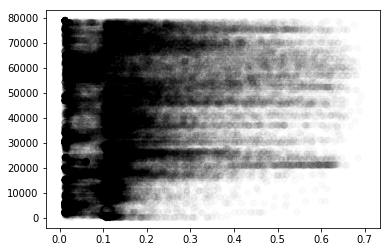

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_train_predict.ravel(),range(0,79084),c=Y_train_binary.ravel(),alpha=0.02, cmap='gray')

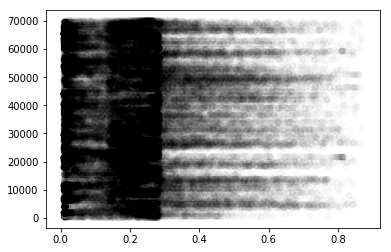

In [219]:
plt.scatter(y_test_predict.ravel(),range(0,70225),c=Y_test_binary.ravel(),alpha=0.02, cmap='gray')

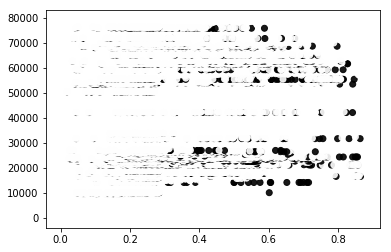

In [220]:
plt.scatter(y_train_predict.ravel(),range(0,79084),c=Y_train_binary.ravel(),alpha=0.9, cmap='Greys')

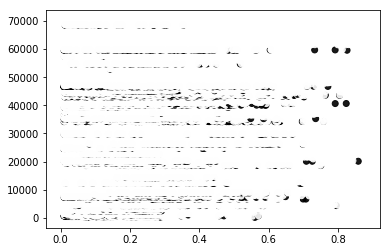

In [221]:
plt.scatter(y_test_predict.ravel(),range(0,70225),c=Y_test_binary.ravel(),alpha=0.9, cmap='Greys')

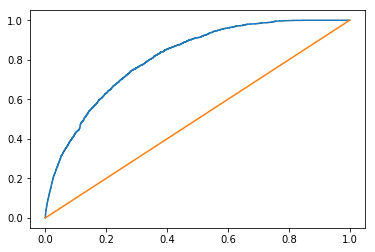

In [223]:
plt.plot(roc_data[0], roc_data[1])
plt.plot(roc_data[1], roc_data[1])
#plt.plot(roc_data[2], roc_data[1])

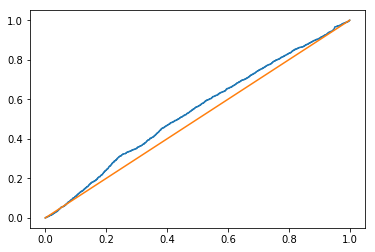

In [224]:
plt.plot(roc_data_test[0], roc_data_test[1])
plt.plot(roc_data_test[1], roc_data_test[1])
#plt.plot(roc_data[2], roc_data[1])

In [225]:
df_egr_train_pred = pd.DataFrame({'pred':y_train_predict.ravel(), 'label': Y_train_binary.ravel()})

In [226]:
df_egr_test_pred = pd.DataFrame({'pred':y_test_predict.ravel(), 'label': Y_test_binary.ravel()})

In [227]:
df_win1 = df_egr_train_pred[df_egr_train_pred['label']>0.5]

In [228]:
df_win1_test = df_egr_test_pred[df_egr_test_pred['label']>0.5]

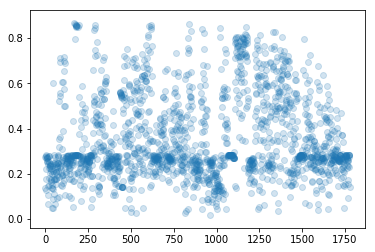

In [230]:
plt.scatter(range(0,len( df_win1['pred'])), df_win1['pred'], alpha=0.2)

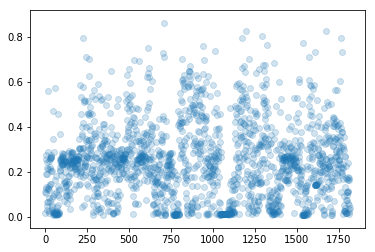

In [231]:
plt.scatter(range(0,len(df_win1_test['pred'])), df_win1_test['pred'], alpha=0.2)

In [232]:
df_win2_test = df_egr_test_pred[df_egr_test_pred['label']<0.5]

In [233]:
df_win2 = df_egr_train_pred[df_egr_train_pred['label']<0.5]

In [234]:
#df_win2_test.describe()

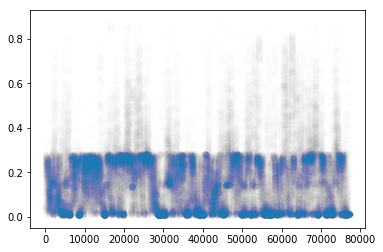

In [235]:
plt.scatter(range(0,len( df_win2['pred'])), df_win2['pred'], alpha=0.002)

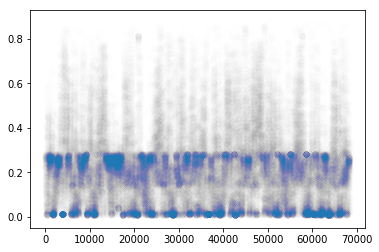

In [236]:
plt.scatter(range(0,len(df_win2_test['pred'])), df_win2_test['pred'], alpha=0.002)

In [238]:
def thres_pred(lis,thres=0.5):
    return list(map(lambda x: 1 if x>=thres else 0, lis))

In [239]:
#df_egr_train_pred['pred'], df_egr_train_pred['label']

In [240]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
pr=[]
rec=[]
acc=[]
cm_ls=[]
for thres in roc_data[2]:
    pred_tmp = thres_pred(thres=thres,lis=df_egr_train_pred['pred'] )
    cm_ls.append(cm(df_egr_train_pred['label'], pred_tmp))
    pr.append(precision_score(df_egr_train_pred['label'], pred_tmp))
    rec.append(recall_score(df_egr_train_pred['label'], pred_tmp))
    acc.append(accuracy_score(df_egr_train_pred['label'], pred_tmp))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
prt=[]
rect=[]
acct=[]
cm_lst=[]
for thres in roc_data_test[2]:
    pred_tmp = thres_pred(thres=thres,lis=df_egr_test_pred['pred'] )
    cm_lst.append(cm(df_egr_test_pred['label'], pred_tmp))
    prt.append(precision_score(df_egr_test_pred['label'], pred_tmp))
    rect.append(recall_score(df_egr_test_pred['label'], pred_tmp))
    acct.append(accuracy_score(df_egr_test_pred['label'], pred_tmp))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [270]:
len(roc_data_test[2])

4129

In [143]:
max(acc)

0.9748621718678873

In [259]:
df_egr_test_pred_score.head()

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
0,68408,0,1817,0,0.000000,0.00000,0.974126,1.870066
1,68407,0,1817,1,0.000000,0.00000,0.974112,0.870066
2,68398,0,1817,10,0.000000,0.00000,0.973984,0.860337
3,68398,1,1816,10,0.090909,0.00055,0.973998,0.859108
4,68322,1,1816,86,0.011494,0.00055,0.972916,0.827037


In [246]:
df_egr_train_pred_score = pd.DataFrame({'cm_TN':list(map( lambda x: x[0][0], cm_ls)), 'cm_TP':list(map( lambda x: x[1][1], cm_ls)), 'cm_FN':list(map( lambda x: x[1][0], cm_ls)), 'cm_FP':list(map( lambda x: x[0][1], cm_ls)), 'pr':pr, 'rec':rec, 'acc':acc, 'thres':roc_data[2]})

In [263]:
df_egr_train_pred_score.to_csv("df_egr_train_pred_score_ANOVA.csv")

In [247]:
df_egr_test_pred_score = pd.DataFrame({'cm_TN':list(map( lambda x: x[0][0], cm_lst)), 'cm_TP':list(map( lambda x: x[1][1], cm_lst)), 'cm_FN':list(map( lambda x: x[1][0], cm_lst)), 'cm_FP':list(map( lambda x: x[0][1], cm_lst)), 'pr':prt, 'rec':rect, 'acc':acct, 'thres':roc_data_test[2]})

In [264]:
df_egr_test_pred_score.to_csv("df_egr_test_pred_score_ANOVA.csv")

In [248]:
# df_egr_train_pred_score[df_egr_train_pred_score['cm_FN']<400]
# plt.hist(df_egr_train_pred_score['acc'].values)
(df_egr_train_pred_score[df_egr_train_pred_score['acc']>0.8]).sort_values(['cm_TP','pr'], ascending=False).head(22)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
2134,62189,1112,666,15117,0.068519,0.625422,0.800427,0.262618
2132,62207,1111,667,15099,0.068538,0.624859,0.800642,0.262679
2133,62189,1111,667,15117,0.068462,0.624859,0.800415,0.262625
2130,62254,1110,668,15052,0.068680,0.624297,0.801224,0.262797
2131,62207,1110,668,15099,0.068480,0.624297,0.800630,0.262683
2128,62274,1109,669,15032,0.068707,0.623735,0.801464,0.262888
2129,62254,1109,669,15052,0.068622,0.623735,0.801211,0.262807
2126,62277,1108,670,15029,0.068662,0.623172,0.801490,0.262897
2127,62274,1108,670,15032,0.068649,0.623172,0.801452,0.262892
2124,62301,1107,671,15005,0.068707,0.622610,0.801780,0.262996


In [249]:
(df_egr_test_pred_score[df_egr_test_pred_score['acc']>0.8]).sort_values(['cm_TP','pr'], ascending=False).head(22)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
785,55795,394,1423,12613,0.030291,0.216841,0.800128,0.348926
783,55806,393,1424,12602,0.030242,0.216291,0.800271,0.349120
784,55795,393,1424,12613,0.030217,0.216291,0.800114,0.348989
781,55907,392,1425,12501,0.030404,0.215740,0.801695,0.350758
782,55806,392,1425,12602,0.030168,0.215740,0.800256,0.349124
779,55944,391,1426,12464,0.030416,0.215190,0.802207,0.351417
780,55907,391,1426,12501,0.030329,0.215190,0.801680,0.350766
777,55950,390,1427,12458,0.030355,0.214640,0.802278,0.351483
778,55944,390,1427,12464,0.030341,0.214640,0.802193,0.351420
775,55962,389,1428,12446,0.030308,0.214089,0.802435,0.351679


In [252]:
(df_egr_train_pred_score[df_egr_train_pred_score['pr']>0.1]).sort_values(['cm_TP','acc'], ascending=False).head(10)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
1231,71169,682,1096,6137,0.100015,0.383577,0.908540,0.340258
1229,71192,681,1097,6114,0.100221,0.383015,0.908818,0.341007
1227,71194,680,1098,6112,0.100118,0.382452,0.908831,0.341113
1228,71192,680,1098,6114,0.100088,0.382452,0.908806,0.341022
1225,71227,679,1099,6079,0.100474,0.381890,0.909236,0.341983
1223,71239,678,1100,6067,0.100519,0.381327,0.909375,0.342423
1224,71227,678,1100,6079,0.100340,0.381327,0.909223,0.341985
1221,71248,677,1101,6058,0.100520,0.380765,0.909476,0.342629
1222,71239,677,1101,6067,0.100386,0.380765,0.909362,0.342429
1219,71255,675,1103,6051,0.100357,0.379640,0.909539,0.342799


In [253]:
(df_egr_test_pred_score[df_egr_test_pred_score['pr']>0.04199]).sort_values(['cm_TP','acc'], ascending=False).head(10)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
3,68398,1,1816,10,0.090909,0.00055,0.973998,0.859108


In [254]:
(df_egr_train_pred_score[df_egr_train_pred_score['rec']>0.7]).sort_values(['acc'], ascending=False).head()

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
2456,58065,1245,533,19241,0.060773,0.700225,0.749962,0.248260
2458,58018,1246,532,19288,0.060680,0.700787,0.749380,0.248148
2457,58018,1245,533,19288,0.060634,0.700225,0.749368,0.248152
2460,58014,1247,531,19292,0.060714,0.701350,0.749342,0.248129
2459,58014,1246,532,19292,0.060668,0.700787,0.749330,0.248130


In [255]:
(df_egr_test_pred_score[df_egr_test_pred_score['rec']>0.5]).sort_values(['acc'], ascending=False).head()

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
1916,38466,909,908,29942,0.029464,0.500275,0.560698,0.235549
1918,38459,910,907,29949,0.029489,0.500826,0.560612,0.235519
1917,38459,909,908,29949,0.029458,0.500275,0.560598,0.235520
1920,38453,911,906,29955,0.029515,0.501376,0.560541,0.235494
1919,38453,910,907,29955,0.029483,0.500826,0.560527,0.235501


Text(0, 0.5, 'Precision')

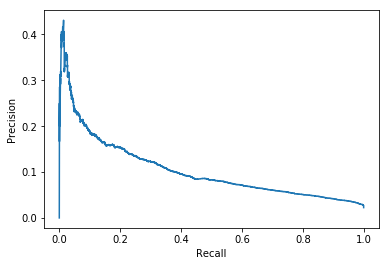

In [256]:
plt.plot(df_egr_train_pred_score['rec'], df_egr_train_pred_score['pr'])
plt.xlabel('Recall')
plt.ylabel('Precision')

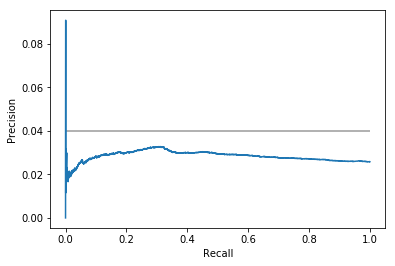

In [257]:
plt.plot(df_egr_test_pred_score['rec'], df_egr_test_pred_score['pr'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.hlines(0.04, 0.0, 1.0, alpha=0.4)

In [258]:
(df_egr_test_pred_score[df_egr_test_pred_score['acc']>0.6]).sort_values(['cm_TP','rec'], ascending=False).head(10)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
1777,41313,845,972,27095,0.030243,0.465052,0.600328,0.248447
1775,41347,844,973,27061,0.030245,0.464502,0.600797,0.248598
1776,41313,844,973,27095,0.030209,0.464502,0.600313,0.248454
1773,41416,843,974,26992,0.030286,0.463952,0.601766,0.248859
1774,41347,843,974,27061,0.030211,0.463952,0.600783,0.248603
1771,41434,842,975,26974,0.030270,0.463401,0.602008,0.248932
1772,41416,842,975,26992,0.030251,0.463401,0.601752,0.248874
1769,41441,841,976,26967,0.030243,0.462851,0.602093,0.248963
1770,41434,841,976,26974,0.030235,0.462851,0.601994,0.248934
1767,41472,840,977,26936,0.030242,0.462300,0.602520,0.249151


In [318]:
(X_test_list[0].shape)

(469, 335)

In [314]:
X_test.columns

Index(['distance_idle%', 'distance_overrun%', 'distance_decel%',
       'distance_accel%', 'distance_cruise%', 'statedwell_km', 'time_idle%',
       'time_overrun%', 'time_decel%', 'time_accel%',
       ...
       'FUEL_CONSUM_kurtosis', 'FUEL_CONSUM_skewness',
       'VEHICAL_BATTERY_POTENTIAL_mean', 'VEHICAL_BATTERY_POTENTIAL_median',
       'VEHICAL_BATTERY_POTENTIAL_variance', 'VEHICAL_BATTERY_POTENTIAL_max',
       'VEHICAL_BATTERY_POTENTIAL_min', 'VEHICAL_BATTERY_POTENTIAL_max-min',
       'VEHICAL_BATTERY_POTENTIAL_kurtosis',
       'VEHICAL_BATTERY_POTENTIAL_skewness'],
      dtype='object', length=269)

In [313]:
df_egr_train_pred.shape

(79084, 2)

In [333]:
len(df_egr_test_pred)

70225

In [335]:
# veh count opti
points=0
flen=0



for i in range(0, len(X_test_list[0:])): # X_train_list
       
    X_test_list[i].fillna(method='ffill', inplace=True)
    X_test_list[i].fillna(method='bfill', inplace=True)
    X_test_list[i].fillna(value=0, inplace=True)
    if(len(X_test_list[i])>0): 
        _x = rs1.transform(X_test_list[i][col_anova])
        # output in test mode = 0
        bottleneck_output = get_layer_output([_x,0])[0]  # bottleneck representation
        y_pred = Clf_rad_v21.predict(bottleneck_output)

        X_test_list[i]['z_pred']=y_pred.ravel()
        #df2=pd.DataFrame(y_pred)
        #points=points+len(y_pred)
        #if (min(df2[0])<= 0.966): l1[vin]=1-min(df2[0])
        


In [336]:
# veh count opti
points=0
flen=0



for i in range(0, len(X_train_list[0:])): # X_train_list
       
    X_train_list[i].fillna(method='ffill', inplace=True)
    X_train_list[i].fillna(method='bfill', inplace=True)
    X_train_list[i].fillna(value=0, inplace=True)
    if(len(X_test_list[i])>0): 
        _x = rs1.transform(X_train_list[i][col_anova])
        # output in test mode = 0
        bottleneck_output = get_layer_output([_x,0])[0]  # bottleneck representation
        y_pred = Clf_rad_v21.predict(bottleneck_output)

        X_train_list[i]['z_pred']=y_pred.ravel()
        #df2=pd.DataFrame(y_pred)
        #points=points+len(y_pred)
        #if (min(df2[0])<= 0.966): l1[vin]=1-min(df2[0])
        


In [298]:
# X_test_list[i].head()

In [331]:
OT= 0.7 #0.203328
fc=0
TN=0
TP=0
FP=0
FN=0
for i in range(0, len(X_test_list[0:])):
    df1=X_test_list[i]
    if(len(df1)>0):
        df2=pd.DataFrame(X_test_list[i]['z_pred'])
        df3 = X_test_list[1][X_test_list[1]['ANN_EGR'].isin(['P1'])] #df3=df1[df1['ANN_Radiator']!='N'][['statedwell_km']] 
        df3['Measurement in KM'] = df3['statedwell_km']

        if(len(df3)==0):
            if(df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].shape[0]==0): TN+=1
            else: FP+=1
        else: 
            if((df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].min() <= df3['Measurement in KM'].min() ) & (df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].max()+25000 >= df3['Measurement in KM'].min() )): TP+=1
            elif((df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].min() <= df3['Measurement in KM'].max() ) & (df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].max()+25000 >= df3['Measurement in KM'].max() )): TP+=1 
            elif(df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].shape[0]==0): FN+=1
            else: FN+=1

#print(vin)
#flen=flen+(len(df3['Measurement in KM'].unique()))
fc=fc+1
   

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [332]:
print(TN, TP, FN, FP ) # test set @ 0.111

0 24 150 0


In [ ]:
OT= 0.7 #0.203328
fc=0
TN=0
TP=0
FP=0
FN=0
for i in range(0, len(X_train_list[0:])):
    df1=X_train_list[i]
    if(len(df1)>0):
        df2=pd.DataFrame(X_test_list[i]['z_pred'])
        df3 = X_test_list[1][X_test_list[1]['ANN_EGR'].isin(['P1'])] #df3=df1[df1['ANN_Radiator']!='N'][['statedwell_km']] 
        df3['Measurement in KM'] = df3['statedwell_km']

        if(len(df3)==0):
            if(df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].shape[0]==0): TN+=1
            else: FP+=1
        else: 
            if((df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].min() <= df3['Measurement in KM'].min() ) & (df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].max()+25000 >= df3['Measurement in KM'].min() )): TP+=1
            elif((df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].min() <= df3['Measurement in KM'].max() ) & (df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].max()+25000 >= df3['Measurement in KM'].max() )): TP+=1 
            elif(df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].shape[0]==0): FN+=1
            else: FN+=1

#print(vin)
#flen=flen+(len(df3['Measurement in KM'].unique()))
fc=fc+1
   

In [329]:
#df1.iloc[(df2[df2['z_pred']>OT]['z_pred']).index]['statedwell_km'].shape[0]
df1=X_test_list[71]
#if(len(df1)>0):
df2=pd.DataFrame(X_test_list[i]['z_pred'])
df3 = X_test_list[1][X_test_list[1]['ANN_EGR'].isin(['P1'])] #df3=df1[df1['ANN_Radiator']!='N'][['statedwell_km']] 
df3['Measurement in KM'] = df3['statedwell_km']
df3

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,distance_idle%,distance_overrun%,distance_decel%,distance_accel%,distance_cruise%,statedwell_km,time_idle%,time_overrun%,time_decel%,...,VEHICAL_BATTERY_POTENTIAL_km,VEHICAL_BATTERY_POTENTIAL_kurtosis,VEHICAL_BATTERY_POTENTIAL_skewness,VEHICAL_BATTERY_POTENTIAL_sum,ANN_EGR,ANN_CylinderHeadGasket,ANN_CylinderHeadCover,ANN_Radiator,z_pred,Measurement in KM
275,275,0.945626,0.000000,3.546099,91.725768,3.782506,80046.765646,14.965986,0.000000,2.040816,...,80046.765646,15.659596,-3.775125,4764.97,P1,0,0,N,0.052017,80046.765646
276,276,2.261307,0.000000,14.321608,73.618090,9.798995,80096.765646,1.941748,0.000000,11.650485,...,80096.765646,92.477759,-9.113460,3532.59,P1,0,0,N,0.135224,80096.765646
277,277,1.172041,1.097759,12.953557,71.164430,13.612213,80146.765646,12.027491,0.343643,5.498282,...,80146.765646,-0.662494,0.668053,33904.35,P1,0,0,N,0.457777,80146.765646
278,278,2.162541,0.000000,19.467710,60.567047,17.802702,80196.765646,98.886081,0.000000,0.177853,...,80196.765646,15.886749,3.878616,275338.04,P1,0,0,N,0.125105,80196.765646


In [ ]:
# veh count
points=0
flen=0
fc=0
TN=0
TP=0
FP=0
FN=0
OT= 0.111 #0.203328


for df1 in X_test_list[0:]: # X_train_list
       
    __x=df1[col_list_335].copy()
    __x.fillna(method='ffill', inplace=True)
    __x.fillna(method='bfill', inplace=True)
    __x.fillna(value=0, inplace=True)
    if(len(__x)>0): 
        _x = rs1.transform(__x)
        # output in test mode = 0
        bottleneck_output = get_layer_output([__x,0])[0]  # bottleneck representation
        y_pred = Clf_rad_v21.predict(bottleneck_output)

        df2=pd.DataFrame(y_pred)
        #points=points+len(y_pred)
        #if (min(df2[0])<= 0.966): l1[vin]=1-min(df2[0])
        df3=df1[df1['ANN_Radiator']!='N'][['statedwell_km']] 
        df3['Measurement in KM'] = df3['statedwell_km']

        if(len(df3)==0):
            if(df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].shape[0]==0): TN+=1
            else: FP+=1
        else: 
            if((df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].min() <= df3['Measurement in KM'].min() ) & (df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].max()+25000 >= df3['Measurement in KM'].min() )): TP+=1
            elif((df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].min() <= df3['Measurement in KM'].max() ) & (df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].max()+25000 >= df3['Measurement in KM'].max() )): TP+=1 
            elif(df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].shape[0]==0): FN+=1
            else: FN+=1

        #print(vin)
        #flen=flen+(len(df3['Measurement in KM'].unique()))
        fc=fc+1
   

In [ ]:
print(TN, TP, FN, FP ) # test set @ 0.111

In [424]:
print(TN, TP, FN, FP ) # test set @ 0.12

103 9 46 16


In [413]:
print(TN, TP, FN, FP ) # test set @ 0.203328

105 8 47 14


In [409]:
print(TN, TP, FN, FP ) # test set @ 0.230706

105 8 47 14


In [411]:
print(TN, TP, FN, FP ) # test set @ 0.590117

119 0 55 0


In [389]:
print(TN, TP, FN, FP ) # tr .113

110 7 33 24


In [407]:
print(TN, TP, FN, FP ) # train set @ 0.1105#001

0 40 0 134


In [376]:
print(TN, TP, FN, FP ) # train set @ 0.176299 

114 5 35 20


In [378]:
print(TN, TP, FN, FP ) # train set @ 0.239928 

114 5 35 20


In [373]:
print(TN, TP, FN, FP ) # train set @ 0.351392

123 3 37 11


0

In [371]:
__x.fillna(method='ffill', inplace=True)
__x.fillna(method='bfill', inplace=True)
__x.fillna(value=0, inplace=True)
__x.dropna().shape

(429, 269)

In [370]:
(__x.describe().iloc[0]).sort_values(ascending=True)

power[75,inf]_min                       0.0
power[75,inf]_median                    0.0
power[75,inf]_kurtosis                  0.0
power[75,inf]_skewness                  0.0
power[75,inf]_mean                      0.0
power[75,inf]_variance                  0.0
power[75,inf]_max                       0.0
power[-inf,-10]_max-min               429.0
power[-10,0]_variance                 429.0
power[-10,0]_median                   429.0
power[-10,0]_mean                     429.0
power[-10,0]_count                    429.0
EFF_TORQUE_mean                       429.0
EFF_TORQUE_median                     429.0
EFF_TORQUE_variance                   429.0
EFF_TORQUE_max                        429.0
EFF_TORQUE_min                        429.0
EFF_TORQUE_max-min                    429.0
EFF_TORQUE_kurtosis                   429.0
EFF_TORQUE_skewness                   429.0
power[-inf,-10]_kurtosis              429.0
Power_mean                            429.0
Power_variance                  

In [4]:
bucket="relai.poc.temp"
file_extn='.csv'
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from d2 import get_vin_list
f1=get_vin_list(bucket=bucket, folder_base='res/1/', file_extn=file_extn)  #reading source
#'s3://{}/{}{}.csv'.format(bucket,'res/1',vin)
setA=set(list(pd.read_csv('ANOVA_EGR.csv')['Feature'])[0:54] ) 
setB=set(['power[0,25]_count %', 'power[75,inf]_count %', 'power[25,75]_count %'])
col_list = list(setA-setB)  # Annova top 51
             
# predictions
from keras import backend as K# with a Sequential model
ib=1
get_layer_output = K.function([autoencoder_egr.layers[0].input], [autoencoder_egr.layers[ib].output])


In [10]:
f1=get_vin_list(bucket=bucket, folder_base='res/1/', file_extn=file_extn)  #reading source
for vin in f1[0:]:
    df1=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'res/1/',vin))
    #df1.columns=[str(i) for i in (df1.columns)]
    c_df3=0
    try:
        df3=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'jcd/',vin))
        c_df3=1
    except:
        c_df3=0
    # y_pred = autoencoder_egr.predict()  # Reconstruction
    try:
        _x=df1[col_list]
        # output in test mode = 0
        bottleneck_output = get_layer_output([_x,0])[0]  # bottleneck representation
        y_pred = predictor_egr.predict(bottleneck_output)
        df2=pd.DataFrame(y_pred)
        '''
        df1=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'res/1/',vin))
        df2=pd.DataFrame(y_pred)
        df3=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'jcd/',vin))
        '''
        plt.figure()
        try: sns.kdeplot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], alpha=0.8,legend=False)
        except: pass
        if (c_df3==1): plt.vlines(df3['Measurement in KM'],0,1)
        plt.vlines(df1[np.isnan(df2[0])]['statedwell_km'],0,1, colors='red', alpha=0.05) #'ENGINE_SPEED_x_count',
        #plt.vlines(df1[df1['ENGINE_SPEED_x_count']<5]['statedwell_km'],0,1, colors='red', alpha=0.03) #
        ax2=plt.twinx()
        ax2.plot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], 1-df2[df2[0]<0.966][0], alpha=0.4)
        ax2.set_ylim(0,1)
        plt.legend().set_visible(False)
        plt.title('EGR failure prediction for {}'.format(vin))
        doc = 'temp.png'
        plt.savefig(doc)
        from boto3 import resource
        s3 = resource('s3')
        from os import remove
        s3.Bucket(bucket).Object('res/8/{}.png'.format(vin)).upload_file(doc)
        remove(doc)
        plt.clf()
        print(vin)
    except: pass

MB1A3CHD2JAEH9187
MB1A3EHD2JPGC1112
MB1A3EHD3JPBE1810
MB1A3EHD5JAGH5930
MB1A3EHDXJAHH5103
MB1CTCFD0HAEG4824
MB1CTCFD3HAEG4803
MB1CTCFD6HAEG4844
MB1CTCHD0HAJH3802
MB1CTCHD0HAVH2225
MB1CTCHD0HEXZ0162
MB1CTCHD0JPAE7090
MB1CTCHD0JPHB6359
MB1CTCHD1HEXY9828
MB1CTCHD1JPGB8828
MB1CTCHD2HAVH2209
MB1CTCHD2HEVZ4367
MB1CTCHD3HEVZ3678
MB1CTCHD3HPWA4775
MB1CTCHD4HAAG7582


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MB1CTCHD4HPWA5613
MB1CTCHD4JADJ1242
MB1CTCHD5HPJB2216
MB1CTCHD5JPEC8773
MB1CTCHD6JPEC8779
MB1CTCHD6JPEC8782
MB1CTCHD6JPEC9172
MB1CTCHD7JAGH6526
MB1CTCHD8HPWA3573
MB1CTCHD8JPEC8783
MB1CTCHD9HPWA4778
MB1CTCHD9JAHH4408
MB1CTCHD9JPEC9005
MB1CTCHD9JPGC1217
MB1JADHD0JRGW0273
MB1KACFD7HPGX1732
MB1KACHD0JPHB8128
MB1KACHD1JRGW2953
MB1KACHD2HEVZ4497
MB1KACHD2JPGC2162
MB1KACHD3HAJH3312
MB1KACHD3JPGC1778
MB1KACHD4HRWU7757
MB1KACHD4JRHV9161
MB1KACHD5HEJZ5499
MB1KACHD6HEJZ5205
MB1KACHD6HRWU6299
MB1KACHD6JRFW8650
MB1KACHD6JRGW3886
MB1KACHD6JRHV7539
MB1KACHD6JRHV9534
MB1KACHD7HEVZ2552
MB1KACHD7HPJB3207
MB1KACHD8HRWU7762
MB1KACHD8JPHB4554
MB1KACHD8JPHB6241
MB1KACHD9JPGB9890
MB1KACHD9JRHV8880
MB1KACHDXHAVH2301
MB1KACHDXJRHV9455
MB1KADYD2HPEY0142
MB1NACHD0HAVH1462
MB1NACHD0HPXA1107
MB1NACHD0JAHH4327
MB1NACHD0JRHV6500
MB1NACHD1HRVV1159
MB1NACHD2HRVU8948
MB1NACHD2HRWU8175
MB1NACHD3HPVA6182
MB1NACHD4JAHH4217
MB1NACHD4JPHB7061
MB1NACHD5HPWA3996
MB1NACHD5JEGZ9945
MB1NACHD6HPJA9422
MB1NACHD7HRVV1456
MB1NACHD7J

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
vin#pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'res/1/',f1[1])) #list(df1.columns)#=[str(i) for i in (df1.columns)]

'MB1A3CHD8JEHZ9434'

In [193]:
# (df2[df2[0]<0.966][0])

Text(0.5, 1.0, 'EGR failure prediction for MB1CTCHD0HAVH2225')

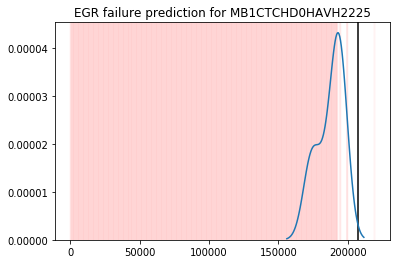

In [170]:
'''
sns.kdeplot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'])
plt.vlines(df3['Measurement in KM'],0,1)
#plt.vlines(df1[np.isnan(df2[0])]['statedwell_km'],0,1, colors='red', alpha=0.05) #'ENGINE_SPEED_x_count',
plt.vlines(df1[df1['ENGINE_SPEED_x_count']<5]['statedwell_km'],0,1, colors='red', alpha=0.03) #
plt.legend().set_visible(False)
plt.title('EGR failure prediction for {}'.format(vin))
'''

(0, 1)

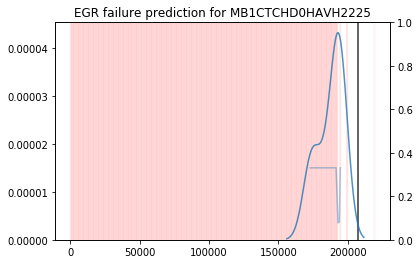

In [201]:
sns.kdeplot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], alpha=0.8)
plt.vlines(df3['Measurement in KM'],0,1, alpha=0.8)
#plt.vlines(df1[np.isnan(df2[0])]['statedwell_km'],0,1, colors='red', alpha=0.05) #'ENGINE_SPEED_x_count',
plt.vlines(df1[df1['ENGINE_SPEED_x_count']<5]['statedwell_km'],0,1, colors='red', alpha=0.03) #
plt.legend().set_visible(False)
plt.title('EGR failure prediction for {}'.format(vin))
ax2=plt.twinx()
ax2.plot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], 1-df2[df2[0]<0.966][0], alpha=0.4)
ax2.set_ylim(0,1)
#ax2.plot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], df2[df2[0]<0.966][0])


In [39]:
#bottleneck
autoencoder_egr.get_layer('bottleneck').shape

In [85]:
from keras import backend as K
# with a Sequential model
get_layer_output = K.function([autoencoder_egr.layers[0].input], [autoencoder_egr.layers[1].output])
# output in test mode = 0
x=df1[col_list].head(2)
bottleneck_output = get_layer_output([x])[0]

In [86]:
layer_output

array([[-1.,  1., -1.,  1.,  1.,  1., -1., -1.],
       [nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [58]:
#autoencoder_egr.get_config()

In [62]:
 for i in range(0,4):
    get_layer_output = K.function([autoencoder_egr.layers[0].input], [autoencoder_egr.layers[i].output])
    # output in test mode = 0
    x=df1[col_list].head(1)
    layer_output = get_layer_output([x,0])[0]
    print(i, layer_output.shape)

0 (1, 16)
1 (1, 8)
2 (1, 16)
3 (1, 51)


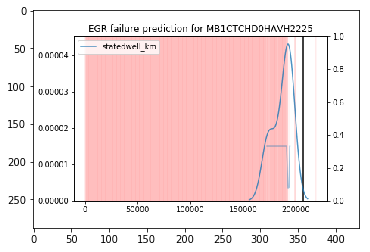

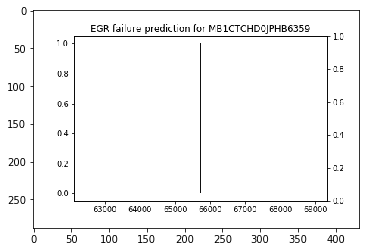

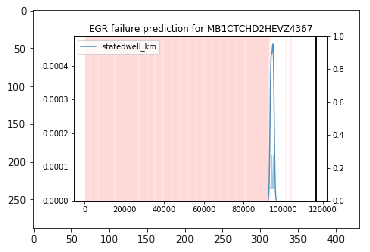

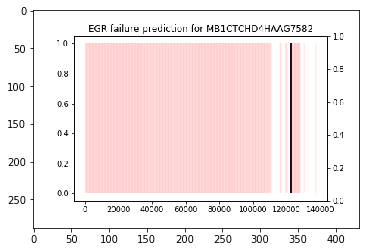

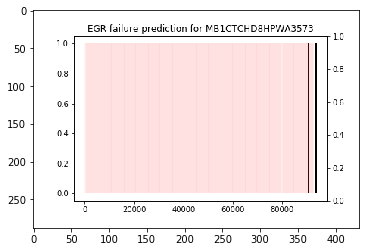

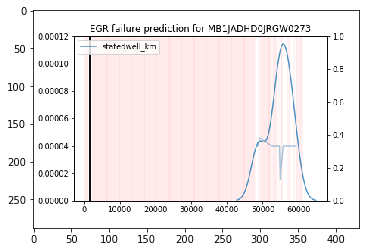

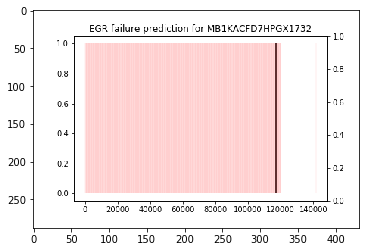

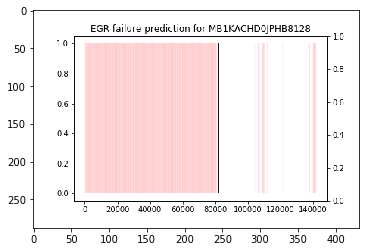

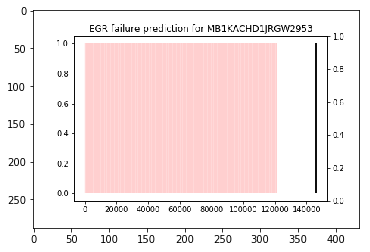

In [269]:
#f6=get_vin_list(bucket=bucket, folder_base='res/7/', file_extn='.png')  #reading source
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import boto3
import io
import tempfile
bucket="relai.poc.temp"
s3 = boto3.resource('s3', region_name='us-east-1')
bucket = s3.Bucket(bucket)
for i in f6[0:9]:
    #print('s3://{}/res/7/{}.png'.format(bucket,i))
    #plt.imread('s3://{}/res/7/{}.png'.format(bucket,i))
    object = bucket.Object('res/7/{}.png'.format(i))
    file_stream = io.BytesIO()
    object.download_fileobj(file_stream)
    #img = plt.imread(file_stream)
    #plt.imshow(img)
    tmp = tempfile.NamedTemporaryFile()
    with open(tmp.name, 'wb') as f:
        object.download_fileobj(f)
        img=mpimg.imread(tmp.name)
        plt.imshow(img)
        # ...Do jobs using img
    plt.show()
    

In [2]:
from d2 import get_vin_list
f_all=get_vin_list(bucket=bucket, folder_base='2/non-unified', file_extn=csv)

all_vins = ['s3://{}/{}{}{}'.format(bucket, '2/non-unified', vin, csv) for vin in f_all]
len(all_vins)

1509

In [9]:
import pandas as pd
X_all = []
for i in all_vins:
    X_all.append(pd.read_csv(i).shape[0])
    print(len(X_all), sum(X_all))


1 32888
2 113528
3 202808
4 288784
5 303177
6 383817
7 473097


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


8 557368
9 577033
10 657673
11 746953
12 832991
13 866196
14 946836
15 1036116
16 1122264
17 1157785
18 1238425
19 1327705
20 1414103
21 1453902
22 1534542
23 1623822
24 1710220
25 1748877
26 1829517
27 1918797
28 2004784
29 2038348
30 2118988
31 2208268
32 2294666
33 2315715
34 2396355
35 2485635
36 2559940
37 2595502
38 2676142
39 2765422
40 2829361
41 2836746
42 2849818
43 2930458
44 3019738
45 3106136
46 3107002
47 3187642
48 3276922
49 3363320
50 3385207
51 3465847
52 3555127
53 3641525
54 3657566
55 3738206
56 3827486
57 3880792
58 3895351
59 3975991
60 4065271
61 4151531
62 4195813
63 4281775
64 4300213
65 4380853
66 4470133
67 4531989
68 4559921
69 4640561
70 4729841
71 4816239
72 4817226
73 4895678
74 4934482
75 5015122
76 5104402
77 5190460
78 5206332
79 5286972
80 5376252
81 5462476
82 5484371
83 5565011
84 5654291
85 5740689
86 5745406
87 5826046
88 5915326
89 5978502
90 6000610
91 6081250
92 6170530
93 6256812
94 6282824
95 6363464
96 6452744
97 6538453
98 6551127
99 66317

In [11]:
len(X_all)

1509

In [ ]:
101420000-

In [7]:
print(sum(X_all))

202808


In [ ]:
X_all_df = pd.concat(X_all, axis=0)
X_all_df.shape